# Titanic - Machine Learning from Disaster
### Using CatBoost Classifier model

# Importing Required Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Training Data

In [2]:
dataset = pd.read_csv('/kaggle/input/titanic/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(dataset.shape)

print(dataset.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
dataset.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [5]:
datatypes = dataset.columns.to_series().groupby(dataset.dtypes).groups
datatypes

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']}

In [6]:
# Dropping PassengerId and Name from Train Dataset

dataset.drop(['PassengerId','Name'], axis=1, inplace = True)

In [7]:
# Converting Categorical Values

dataset[['Survived', 'Pclass','Sex','Cabin','Ticket','Embarked']] = dataset[['Survived', 'Pclass','Sex','Ticket','Cabin', 'Embarked']].apply(LabelEncoder().fit_transform)

In [8]:
# Check for NAN values

dataset.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64

In [9]:
# Filling NaN values with median

dataset["Age"].fillna(dataset["Age"].median(),inplace=True)

In [10]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,1,22.0,1,0,147,7.2500,523,2
1,1,0,0,38.0,1,0,81,71.2833,596,0
2,1,2,0,26.0,0,0,147,7.9250,669,2
3,1,0,0,35.0,1,0,55,53.1000,49,2
4,0,2,1,35.0,0,0,147,8.0500,472,2
...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,27.0,0,0,147,13.0000,101,2
887,1,0,0,19.0,0,0,30,30.0000,14,2
888,0,2,0,28.0,1,2,147,23.4500,675,2
889,1,0,1,26.0,0,0,60,30.0000,8,0


In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,1.308642,0.836071,0.00,1.0000,2.0000,2.0,2.0000
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Ticket,891.0,130.744108,36.024237,0.00,147.0000,147.0000,147.0,147.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Cabin,891.0,338.528620,200.850657,0.00,158.5000,337.0000,519.5,680.0000
Embarked,891.0,1.538721,0.794231,0.00,1.0000,2.0000,2.0,3.0000


# Data Visualisation

(10.5, -0.5)

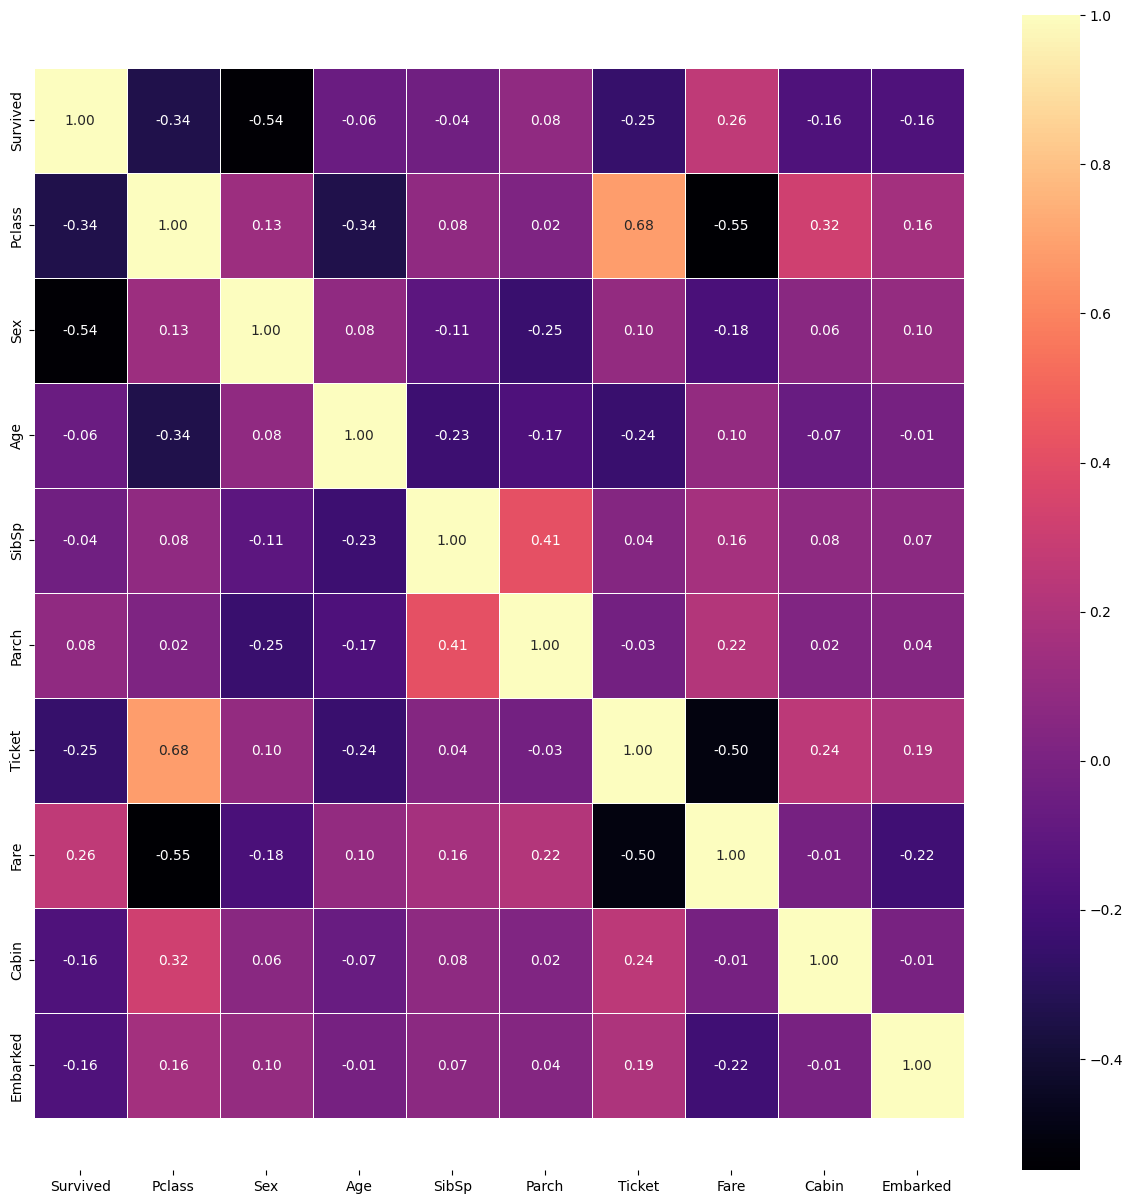

In [12]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5,fmt=".2f", cmap="magma");                                  
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: title={'center': 'Correlation with Survived '}>

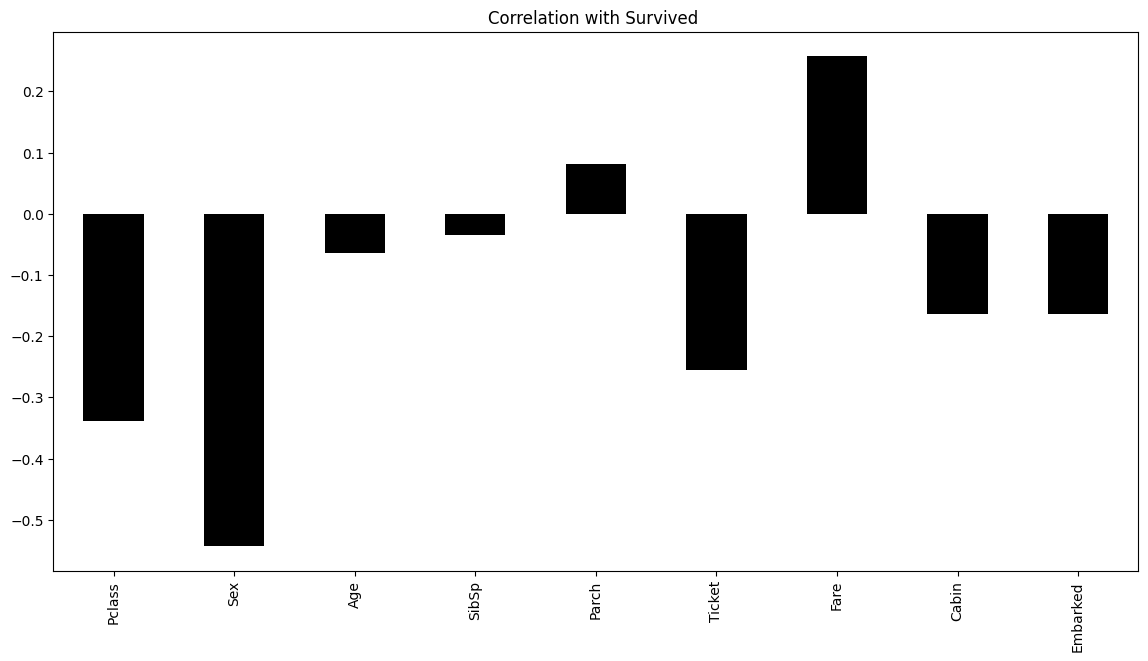

In [13]:
dataset.drop('Survived', axis=1).corrwith(dataset.Survived).plot(kind='bar', color='Black', figsize=(14, 7), title="Correlation with Survived ")


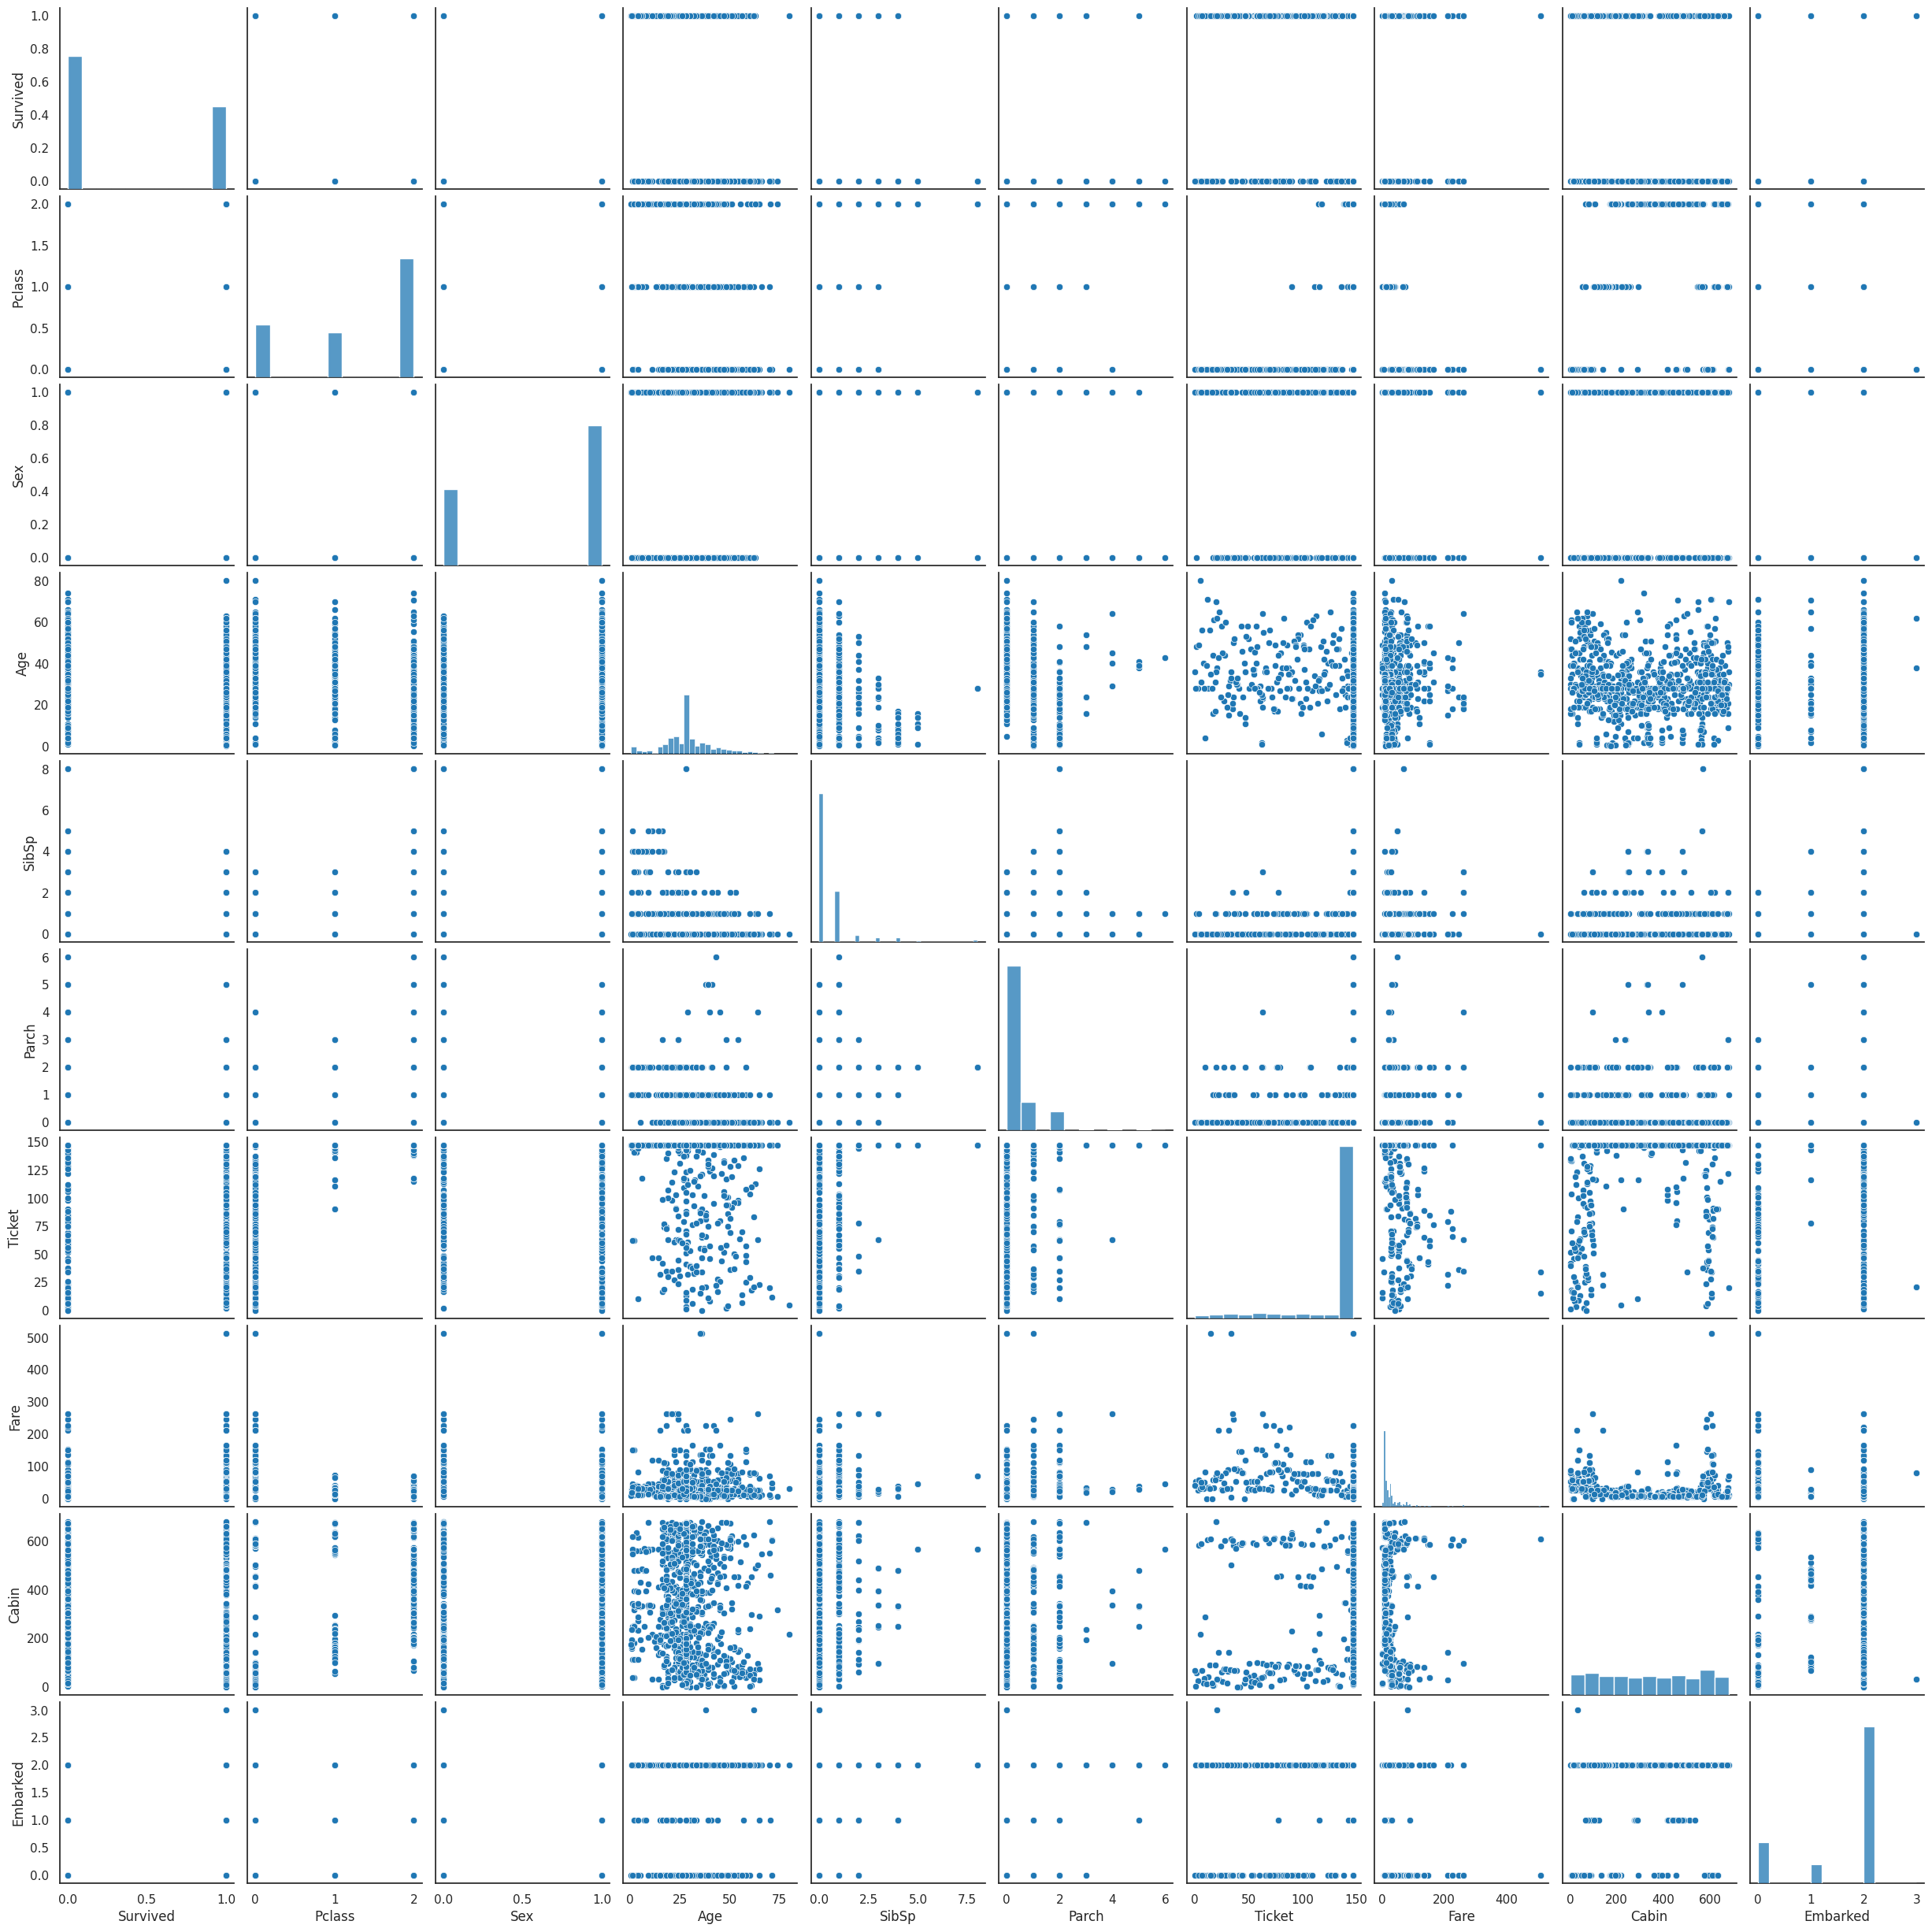

In [14]:
# Plotting

sns.set_context('notebook')
sns.set_style('white')
sns.pairplot(dataset); 

In [15]:
# Choosing X and y 

X = dataset.drop('Survived', axis=1)
y = dataset.Survived

In [16]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,22.0,1,0,147,7.2500,523,2
1,0,0,38.0,1,0,81,71.2833,596,0
2,2,0,26.0,0,0,147,7.9250,669,2
3,0,0,35.0,1,0,55,53.1000,49,2
4,2,1,35.0,0,0,147,8.0500,472,2
...,...,...,...,...,...,...,...,...,...
886,1,1,27.0,0,0,147,13.0000,101,2
887,0,0,19.0,0,0,30,30.0000,14,2
888,2,0,28.0,1,2,147,23.4500,675,2
889,0,1,26.0,0,0,60,30.0000,8,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Test Data

In [18]:
dataset_test = pd.read_csv('/kaggle/input/titanic/test.csv')
dataset_test1 = dataset_test.copy()

dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
# Dropping PassengerId and Name from Test Dataset

dataset_test.drop(['PassengerId','Name'], axis=1, inplace = True)

In [20]:
# Converting Categorical Values

dataset_test[['Pclass','Sex', 'Cabin','Ticket','Embarked']] = dataset_test[['Pclass','Sex', 'Cabin','Ticket','Embarked']].apply(LabelEncoder().fit_transform)

In [21]:
# Check for NAN values

dataset_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Cabin        0
Embarked     0
dtype: int64

In [22]:
# Filling NaN values with median

dataset_test["Age"].fillna(dataset_test["Age"].median(),inplace=True)

# Machine Learning

## CatBoost Classifier model

In [23]:
cat = CatBoostClassifier(iterations=100, depth=8, learning_rate=0.1,loss_function='Logloss', custom_metric=['AUC'], random_seed=42)

In [24]:
cat.fit(X, y)

0:	learn: 0.6569288	total: 57.6ms	remaining: 5.71s
1:	learn: 0.6231478	total: 60.5ms	remaining: 2.96s
2:	learn: 0.5983945	total: 62.8ms	remaining: 2.03s
3:	learn: 0.5742399	total: 63.5ms	remaining: 1.52s
4:	learn: 0.5541878	total: 64ms	remaining: 1.22s
5:	learn: 0.5363375	total: 65.9ms	remaining: 1.03s
6:	learn: 0.5212518	total: 68.2ms	remaining: 906ms
7:	learn: 0.5058716	total: 70.2ms	remaining: 808ms
8:	learn: 0.4945746	total: 72.4ms	remaining: 732ms
9:	learn: 0.4829477	total: 73.8ms	remaining: 664ms
10:	learn: 0.4726198	total: 76ms	remaining: 615ms
11:	learn: 0.4659033	total: 76.5ms	remaining: 561ms
12:	learn: 0.4578018	total: 78.5ms	remaining: 526ms
13:	learn: 0.4507746	total: 79.1ms	remaining: 486ms
14:	learn: 0.4440644	total: 80.5ms	remaining: 456ms
15:	learn: 0.4386792	total: 81.5ms	remaining: 428ms
16:	learn: 0.4333802	total: 83.6ms	remaining: 408ms
17:	learn: 0.4282118	total: 84.6ms	remaining: 385ms
18:	learn: 0.4229881	total: 86.8ms	remaining: 370ms
19:	learn: 0.4192751	total

In [25]:
pred_t = cat.predict(X_test)

# Evaluation

### R-Squared Error

In [26]:
print("R^2 on training  data ",cat.score(X_train, y_train))
print("R^2 on testing data ",cat.score(X_test,y_test))

R^2 on training  data  0.8876404494382022
R^2 on testing data  0.8992537313432836


### RMSE

In [27]:
mse = mean_squared_error(y_test, pred_t)
rmse = np.sqrt(mse)
rmse


0.3174055271363692

# Prediction

In [28]:
pred_cat = cat.predict(dataset_test)

In [29]:
pred = pd.DataFrame(pred_cat, columns=['Survived'])
output = pd.concat([dataset_test1['PassengerId'],pred],axis=1).set_index(['PassengerId'])
output.to_csv('submission.csv')

In [30]:
output

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
